# Example of a single spectrum fit.

## First step: extracting and viewing the spectrum

In [1]:
# inline plotting for jupyter notebook. Do not put this line in a real python script.
%matplotlib inline

In [2]:
# import base class for the manipulation of a SITELLE spectral cube: HDFCube
from orcs.core import HDFCube
import pylab as pl

In [3]:
# load spectral cube
cube = HDFCube('/home/thomas/M31_SN3.merged.cm1.1.0.hdf5')

INFO| Data shape : (2048, 2064, 840)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


INFO| Number of integrated pixels: 13


 [==========] [100%] [completed in 0.016 s]                                   

INFO| Init of the parallel processing server with 4 threads



 [==========] [100%] [completed in 0.428 s]                                   


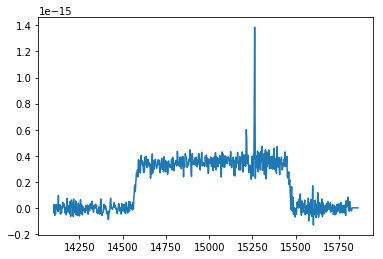

In [4]:
# extract and plot a spectrum at x=919 y=893 integrated over a radius of 2 pixels
axis, spectrum = cube.extract_spectrum(919, 893, 2)
pl.plot(axis, spectrum)

## Second step: fitting the spectrum

* The emission lines to fit are passed by name (their wavenumber, in cm-1, could also be given directly). 
  Remember that:
  
  $\sigma [\text{cm}^{-1}] = \frac{1e7}{\lambda [\text{nm}]}$
  
  
  
* The line model is `gaussian` by default. Here we use the more realistic model of a cardinal sinus convoluted with a gaussian `sincgauss`:
  
  ```python
  fmodel = 'sinc'
  ```


* The velocity of the lines is -513 km/s. It is passed with the argument:

  ```python
  pos_cov = -513`,
  pos_def = ['1','1']
  ```
  

  The velocity is considered as a covarying parameter. By default all the lines are considered to have a free velocity parameter. If we want to set the same velocity to all the lines we must set the definition of the position of eachline to the same covaying group with `pos_def = ['1','1']`.



In [5]:
axis, spectrum, fit_res = cube.fit_lines_in_spectrum(919, 893, 2, ['Halpha', '[NII]6583'],
                                                     fmodel='sinc',
                                                     pos_cov=-513,
                                                     pos_def=['1', '1'])
print '\n===== Results ======'
print 'Velocity: ', fit_res['velocity_gvar']
print 'Flux: ', fit_res['flux_gvar'] 
print '===================='

INFO| Number of integrated pixels: 13


 [==========] [100%] [completed in 0.020 s]                                   

INFO| Init of the parallel processing server with 4 threads



 [==========] [100%] [completed in 0.431 s]                                   

WARNING| /home/thomas/Astro/Python/ORB/Orcs/orcs/core.py:1673: RuntimeWarning: invalid value encountered in sqrt
  noise_counts = np.sqrt(total_counts)





===== Results ======
Velocity:  [-507.4(1.0) -507.4(1.0)]
Flux:  [1.181(44)e-15 2.96(44)e-16]


### Ungroup the velocity parameter

We can ungroup the velocity of the emission lines by giving each line a unique group label. We can set:
  
  `pos_def=['1', '2']`
  
I this case the measured velocity must be different for both lines. But the precision will also be worsen.


In [6]:
axis, spectrum, fit_res = cube.fit_lines_in_spectrum(919, 893, 2, ['Halpha', '[NII]6583'],
                                                     fmodel='sinc',
                                                     pos_cov=(-513, -513),
                                                     pos_def=['1', '2'])
print '\n===== Results ======'
print 'Velocity: ', fit_res['velocity_gvar']
print 'Flux: ', fit_res['flux_gvar'] 
print '===================='

INFO| Number of integrated pixels: 13


 [==========] [100%] [completed in 0.015 s]                                   

INFO| Init of the parallel processing server with 4 threads



 [==========] [100%] [completed in 0.500 s]                                   

===== Results ======
Velocity:  [-506.9(1.1) -513.7(4.2)]
Flux:  [1.182(44)e-15 3.01(44)e-16]


### using a sincgauss model with a single broadening parameter

We can try the broadened sincgauss model (sinc instrumental function convoluted with a gaussian). We can group the broadening parameter of the emission lines by giving the same group label to the lines. We can set:
  
  ```python
  fmodel='sincgauss',
  sigma_def=['1', '1'],
  sigma_cov=20
  ```
  
I this case the measured broadening will be the same for both lines and the precision of the estimations are better.
Note that the broadening must be initialized to a nonzero value for the fit to work `sigma_cov=20`

In [10]:
axis, spectrum, fit_res = cube.fit_lines_in_spectrum(
    919, 893, 2, ['Halpha', '[NII]6583'],
    fmodel='sincgauss',
    pos_cov=-513,
    pos_def=['1', '1'],
    sigma_def=['1', '1'],
    sigma_cov=20)
print '\n===== Results ======'
print 'Velocity: ', fit_res['velocity_gvar']
print 'Broadening: ', fit_res['broadening_gvar'] 
print 'Flux: ', fit_res['flux_gvar'] 
print '===================='

INFO| Number of integrated pixels: 13


 [====      ] [44%] [Loading data] [remains: 0.008 s]                         

INFO| Number of integrated pixels: 13


 [==========] [100%] [completed in 0.030 s]                                   

INFO| Number of integrated pixels: 13
INFO| Init of the parallel processing server with 4 threads



 [==========] [100%] [completed in 0.497 s]                                   

===== Results ======
Velocity:  [-506.4(1.3) -506.4(1.3)]
Broadening:  [25.9(1.6) 25.9(1.6)]
Flux:  [1.681(86)e-15 4.40(59)e-16]


### Plotting the result

(14500, 15500)

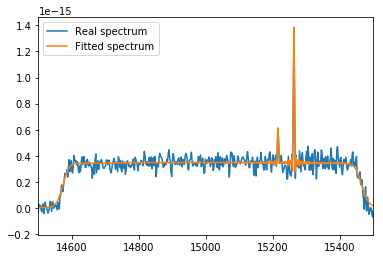

In [11]:
pl.plot(axis, spectrum, label='Real spectrum')
pl.plot(axis, fit_res['fitted_vector'], label='Fitted spectrum')
pl.legend()
pl.xlim((14500, 15500))

### Model with no filter

The filter model can be removed but the range over which the fit is made must be limited to the filter bandpass. This is made transparently by setting the option

`nofilter = True`


INFO| Number of integrated pixels: 13


 [==========] [100%] [completed in 0.025 s]                                   

INFO| Number of integrated pixels: 13
INFO| Init of the parallel processing server with 4 threads



 [==========] [100%] [completed in 0.443 s]                                   

===== Results ======
Velocity:  [-506.4(1.5) -506.4(1.5)]
Broadening:  [26.2(1.8) 26.2(1.8)]
Flux:  [1.676(98)e-15 4.47(68)e-16]


(14500, 15500)

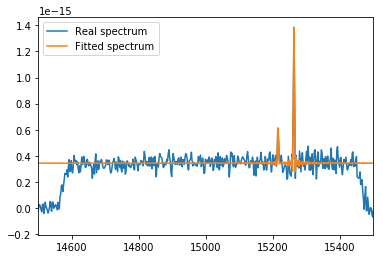

INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Number of integrated pixels: 13
IN

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number of integrated pixels: 13
INFO| Number

INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing server with 4 threads
INFO| Init of the parallel processing se

WARNING| /home/thomas/Astro/Python/ORB/Orb/orb/utils/image.py:938: RuntimeWarning: Mean of empty slice
  return np.squeeze(np.nanmean(np.nanmean(im_view, axis=3), axis=1))

WARNING| /home/thomas/Astro/Python/ORB/Orb/orb/utils/image.py:938: RuntimeWarning: Mean of empty slice
  return np.squeeze(np.nanmean(np.nanmean(im_view, axis=3), axis=1))

WARNING| /home/thomas/Astro/Python/ORB/Orb/orb/utils/image.py:938: RuntimeWarning: Mean of empty slice
  return np.squeeze(np.nanmean(np.nanmean(im_view, axis=3), axis=1))

WARNING| /home/thomas/Astro/Python/ORB/Orb/orb/utils/image.py:938: RuntimeWarning: Mean of empty slice
  return np.squeeze(np.nanmean(np.nanmean(im_view, axis=3), axis=1))

WARNING| /home/thomas/Astro/Python/ORB/Orb/orb/utils/image.py:938: RuntimeWarning: Mean of empty slice
  return np.squeeze(np.nanmean(np.nanmean(im_view, axis=3), axis=1))

WARNING| /home/thomas/Astro/Python/ORB/Orb/orb/utils/image.py:938: RuntimeWarning: Mean of empty slice
  return np.squeeze(np.nanmean(n

In [12]:
axis, spectrum, fit_res = cube.fit_lines_in_spectrum(
    919, 893, 2, ['Halpha', '[NII]6583'],
    fmodel='sincgauss',
    pos_cov=-513,
    pos_def=['1', '1'],
    sigma_def=['1', '1'],
    sigma_cov=20,
    nofilter=True)
print '\n===== Results ======'
print 'Velocity: ', fit_res['velocity_gvar']
print 'Broadening: ', fit_res['broadening_gvar'] 
print 'Flux: ', fit_res['flux_gvar'] 
print '===================='
pl.plot(axis, spectrum, label='Real spectrum')
pl.plot(axis, fit_res['fitted_vector'], label='Fitted spectrum')
pl.legend()
pl.xlim((14500, 15500))